### 💎 Diamond Price Prediction - ML Group Project

#### 👥 A Team Full of Diamonds 
- **Anindya**
- **Jairo**
- **Peter**
- **Stefano**
- **Tiago**

#### 📌 Project Overview
This project aims to develop a **machine learning model** to accurately predict the price of diamonds based on key attributes such as **carat, cut, color, clarity, and more**. 

By leveraging **data science techniques**, our goal is to create a **robust and reliable model** that provides pricing insights for:
- **Buyers** looking for fair market prices.
- **Sellers** seeking competitive pricing.
- **Enthusiasts** interested in diamond valuation.

#### 📊 Dataset
We are using a **publicly available dataset** that includes various features influencing diamond prices:

| Feature  | Description |
|----------|------------|
| **Carat** | Weight of the diamond. |
| **Cut** | Quality of the diamond's cut (**Fair, Good, Very Good, Premium, Ideal**). |
| **Color** | Diamond color grade (**J (worst) to D (best)**). |
| **Clarity** | Measurement of internal flaws (**I1 (worst) to IF (best)**). |
| **Depth** | Total depth percentage. |
| **Table** | Width of the top of the diamond relative to its widest point. |
| **X, Y, Z** | Dimensions of the diamond in mm. |
| **Price** | The price of the diamond in USD (**target variable**). |

#### 🛠️ Technologies Used
- **Python** (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)
- **Jupyter Notebook**
- **Machine Learning Algorithms** (Regression models)
- **Data Preprocessing & Feature Engineering**

#### 🚀 Goals & Expected Outcomes
- Develop an **accurate predictive model** for diamond prices.
- Understand the **impact of different attributes** on pricing.
- Provide **data-driven insights** for valuation.

#### Table of Contents
- [1. Exploratory Data Analysis (EDA)](#1-exploratory-data-analysis-eda)
  - [1.1 Basic Exploration](#11-basic-exploration)
  - [1.2 EDA - Numerical variables](#12-eda---numerical-variables)
  - [1.3 EDA - Categorical variables](#13-eda---categorical-variables)
- [2. Pre-processing and Feature Engineering](#2-pre-processing-and-feature-engineering)
- [3. Modeling and Evaluation](#3-modeling-and-evaluation)
  - [3.1 Linear Regression (Baseline)](#31-linear-regression-baseline)
  - [3.2 Linear Regression with Polynomial Features](#32-linear-regression-with-polynomial-features)
  - [3.3 XGBoost](#33-xgboost)
- [4. Conclusion](#4-conclusion)


In [1]:
# Python Version
!python --version

Python 3.12.9


In [2]:
# Import Required Libraries
import openml  # For fetching datasets from OpenML
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Numerical computations
from ydata_profiling import ProfileReport # Automated EDA

# Scikit-learn Utilities
from sklearn.model_selection import train_test_split, GridSearchCV  # Splitting data & hyperparameter tuning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures  # Feature preprocessing
from sklearn.pipeline import Pipeline  # Building ML pipelines
from sklearn.compose import ColumnTransformer  # Handling categorical and numerical features separately
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model evaluation metrics

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Linear regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
import xgboost as xgb  # Extreme Gradient Boosting (XGBoost) model

%matplotlib inline

#### 1. Exploratory Data Analysis (EDA)

##### 1.1 Basic Exploration

In [3]:
# Load the diamond dataset from OpenML
dataset = openml.datasets.get_dataset(42225)  # Diamond dataset ID on OpenML
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [4]:
# Dataset Description 
print(
f"This is dataset '{dataset.name}', the target feature is "
f"'{dataset.default_target_attribute}'"
)
print(f"URL: {dataset.url}")
print(dataset.description)

This is dataset 'diamonds', the target feature is 'price'
URL: https://api.openml.org/data/v1/download/21792853/diamonds.arff
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)


In [5]:
# Explore the dataset
df = pd.concat([X, y], axis=1)
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (53940, 10)


carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335

In [6]:
# Dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
 9   price    53940 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
# Check for null values in the dataset
print("Null Values in Dataset:\n", df.isnull().sum())

Null Values in Dataset:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [8]:
# Check for duplicate rows in the dataset
print("Duplicate Rows in Dataset:", df.duplicated().sum())
print("Percentage of Duplicates:", round(df.duplicated().sum() / len(df) * 100,2), "%")

Duplicate Rows in Dataset: 146
Percentage of Duplicates: 0.27 %


In [9]:
# Automated EDA using ydata_profiling
profile = ProfileReport(df, title="Diamond Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Insights from Basic Exploration**
1. **Dataset Composition**: The dataset consists of 10 variables, with 7 numerical features and 3 categorical features (cut, color, and clarity).
2. **Target Variable**: The price column is the dependent variable we aim to predict.
3. **Missing Values**: There are no missing values in the dataset, ensuring a complete dataset for analysis.
4. **Duplicate Rows**: The dataset contains `146` duplicate rows, accounting for `0.27%` of the total data. These will be removed to avoid redundancy in modeling.

##### 1.2 EDA - Numerical variables

In [10]:
# Statistical summary of numerical features before Feature engineering
df.describe()

carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  
max       31.800000  18823.000000

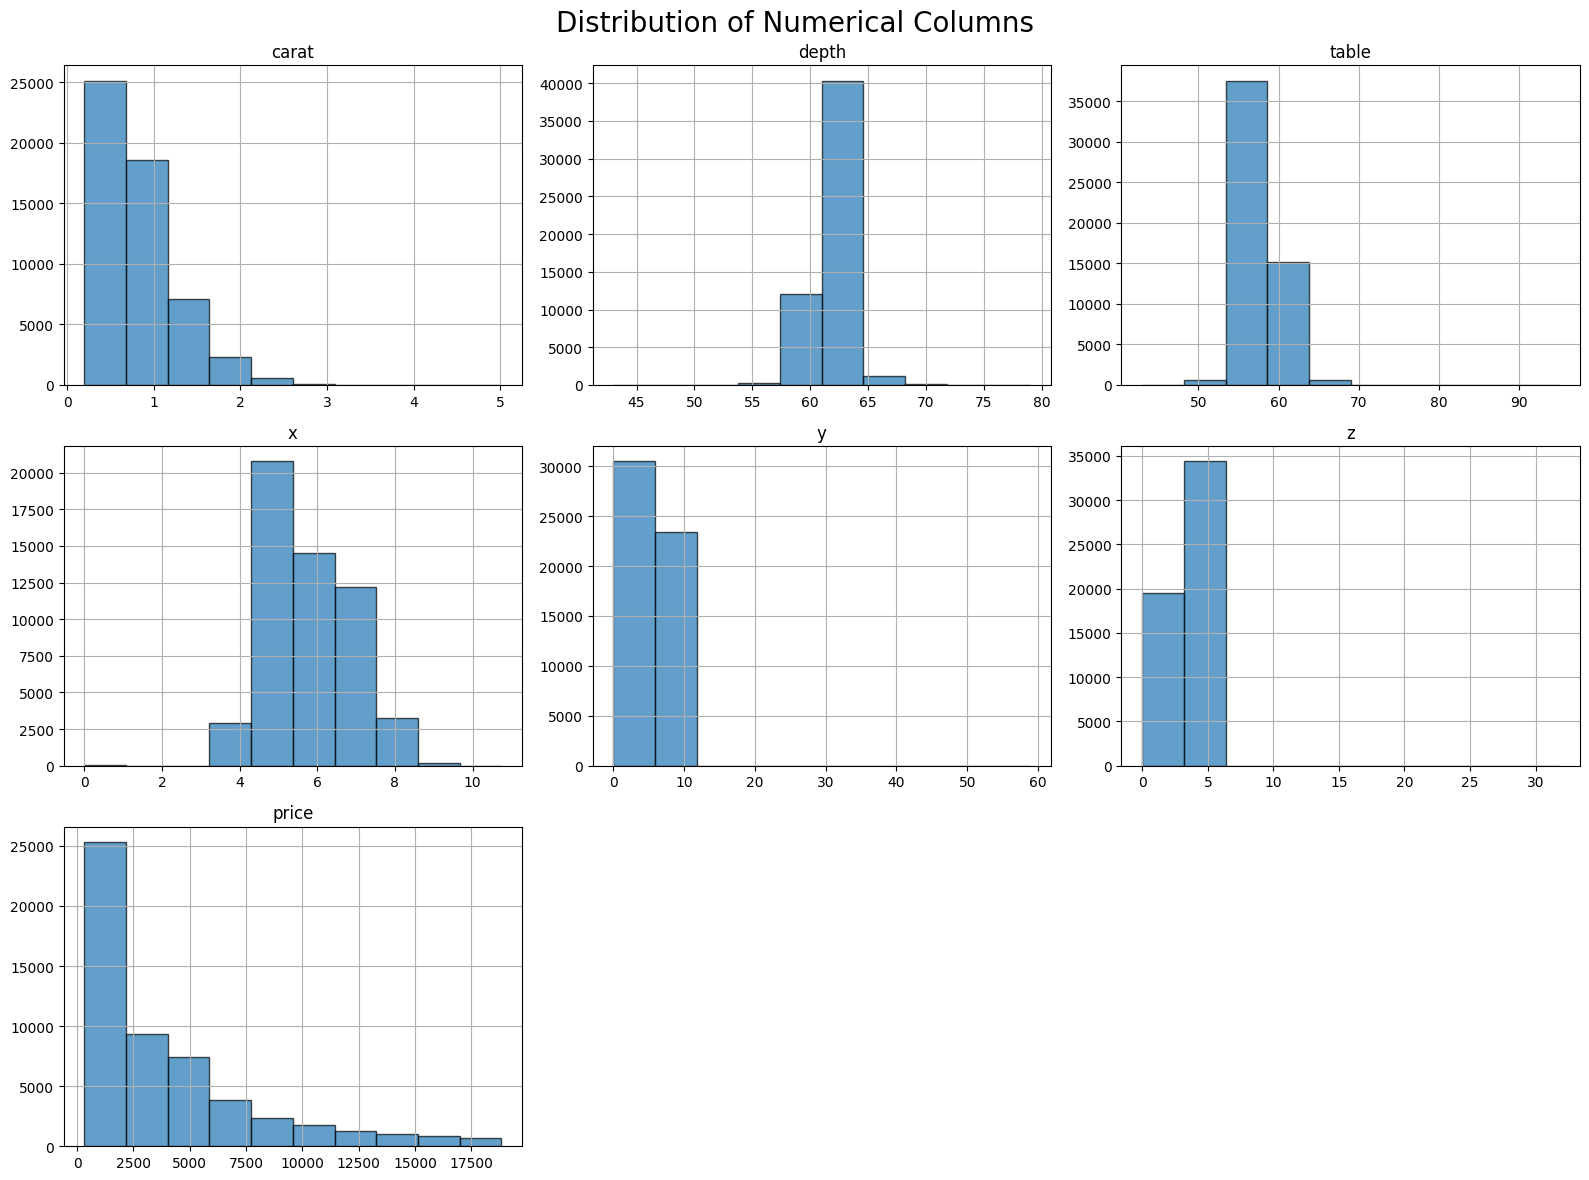

In [11]:
# Plot histograms for each numerical column
fig = df.hist(figsize=(16, 12), bins=10, edgecolor='black', alpha=0.7)

# Add a main title
plt.suptitle('Distribution of Numerical Columns', fontsize=20)

# Improve layout spacing
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 1200x800 with 0 Axes>

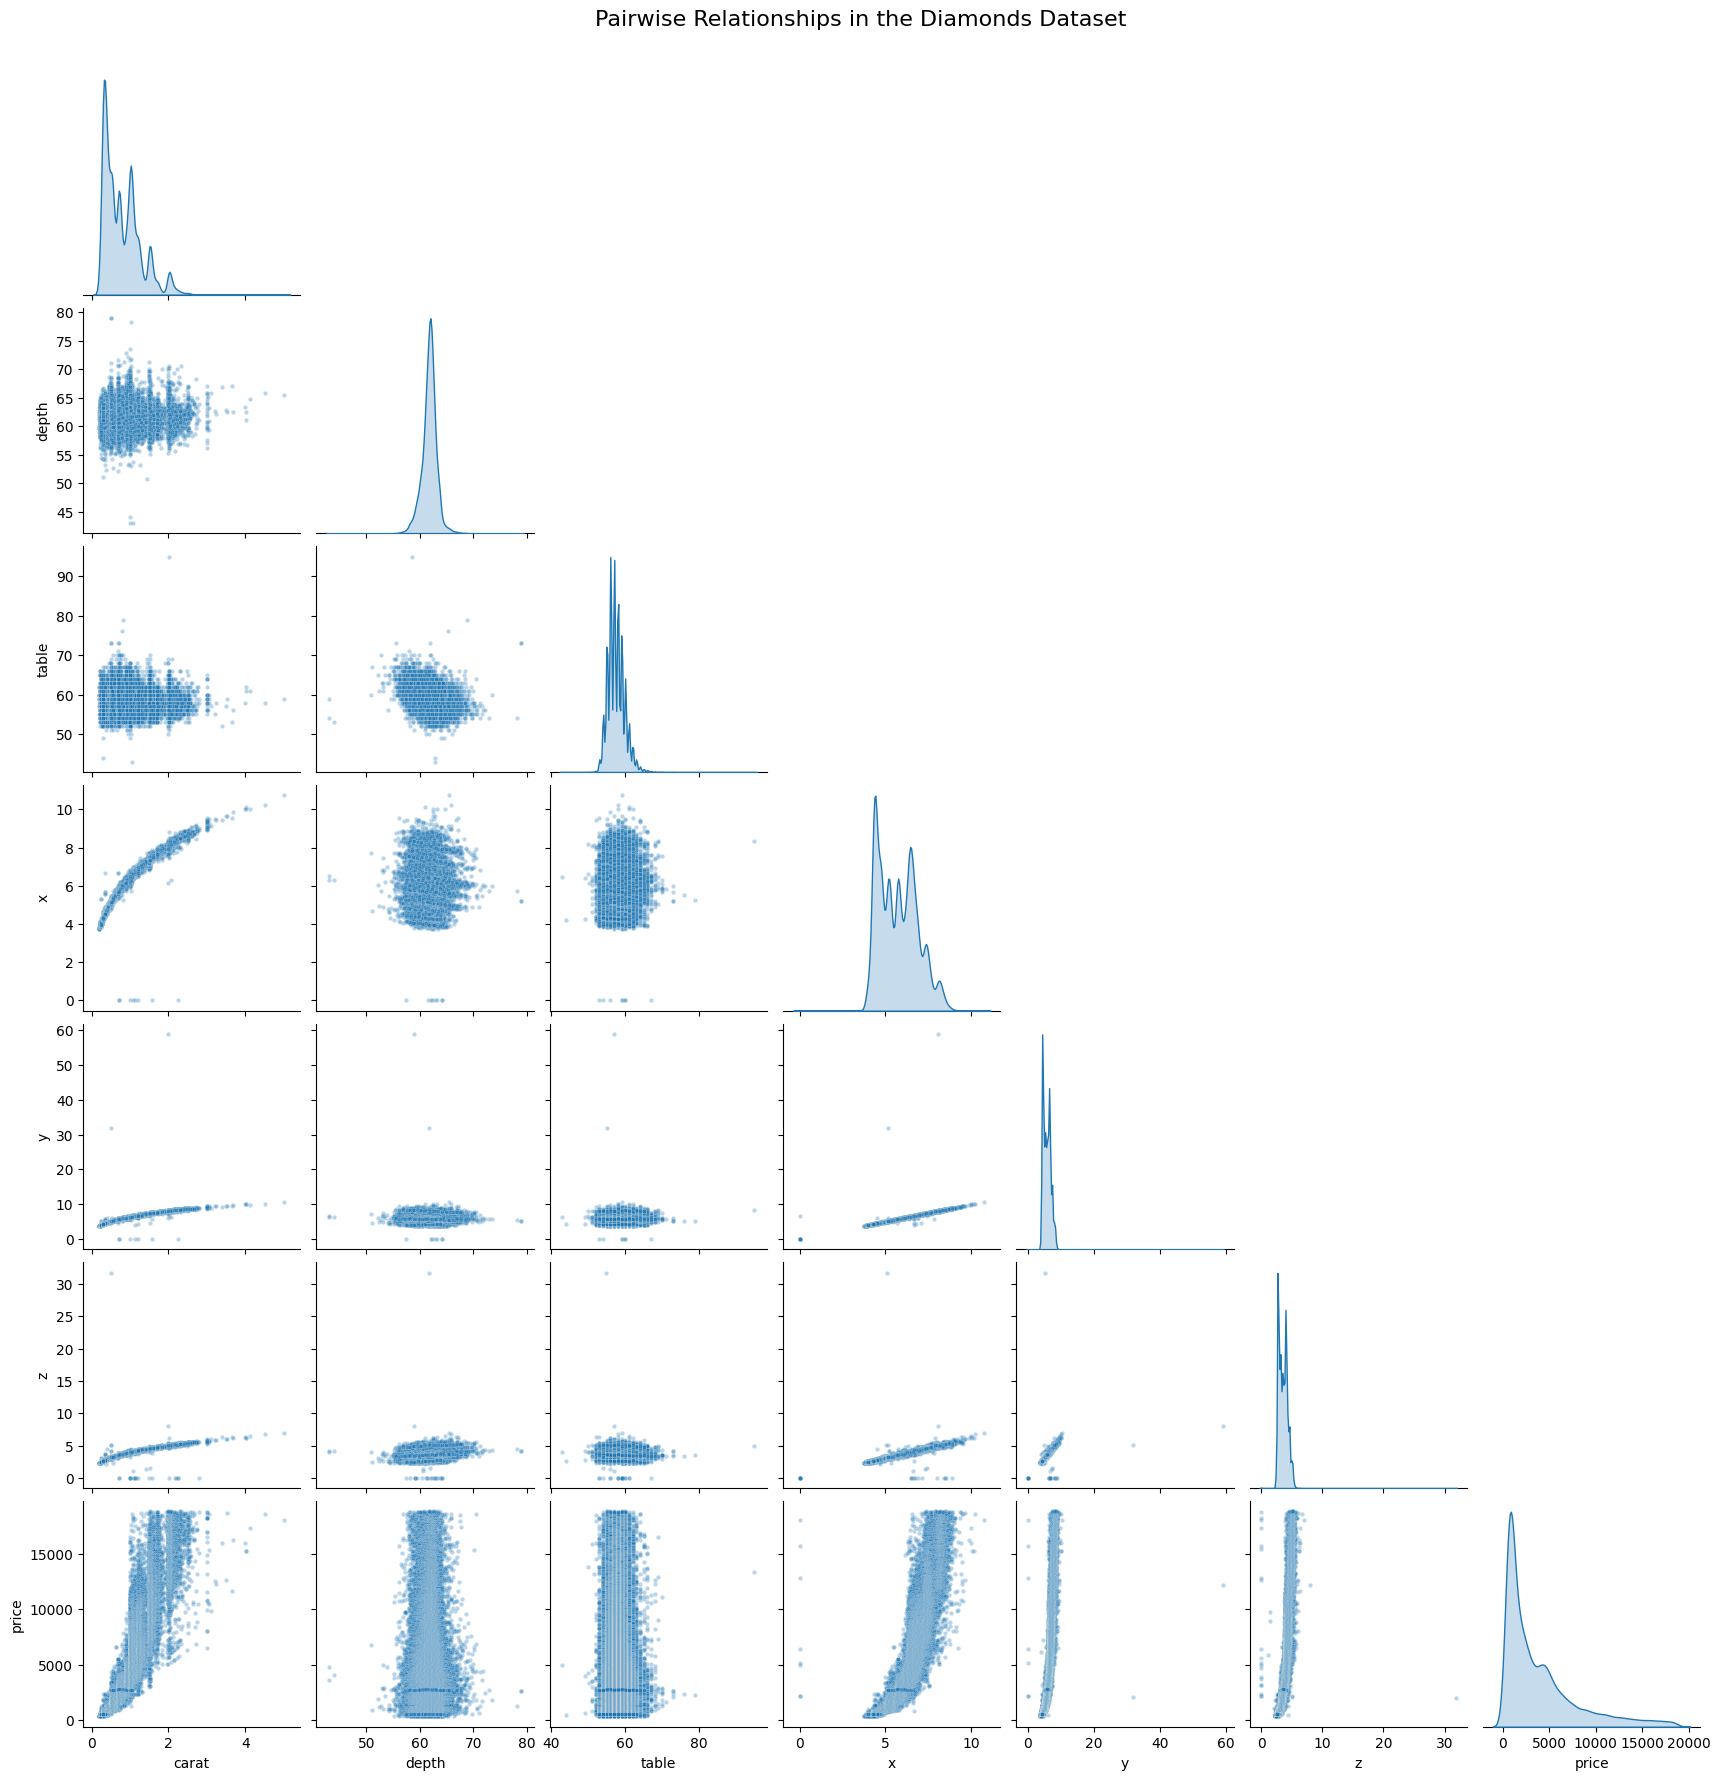

In [12]:
# Create Pairplot for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set figure size
plt.figure(figsize=(12, 8))  

# Generate the pairplot with kernel density estimates (KDE)
sns.pairplot(data = df, 
             diag_kind='kde',  # Kernel Density Estimation for histograms
             plot_kws={'alpha': 0.3, 's': 10},  # Set transparency & size of scatter points
             #hue="cut", # Color by cut or any categorical column
             corner=True)  # Show only the lower triangle of the matrix to avoid redundancy

# Add title to the plot
plt.suptitle("Pairwise Relationships in the Diamonds Dataset", 
             fontsize=16, y=1.02)  # Adjust title position for better visibility

# Show plot
plt.show()

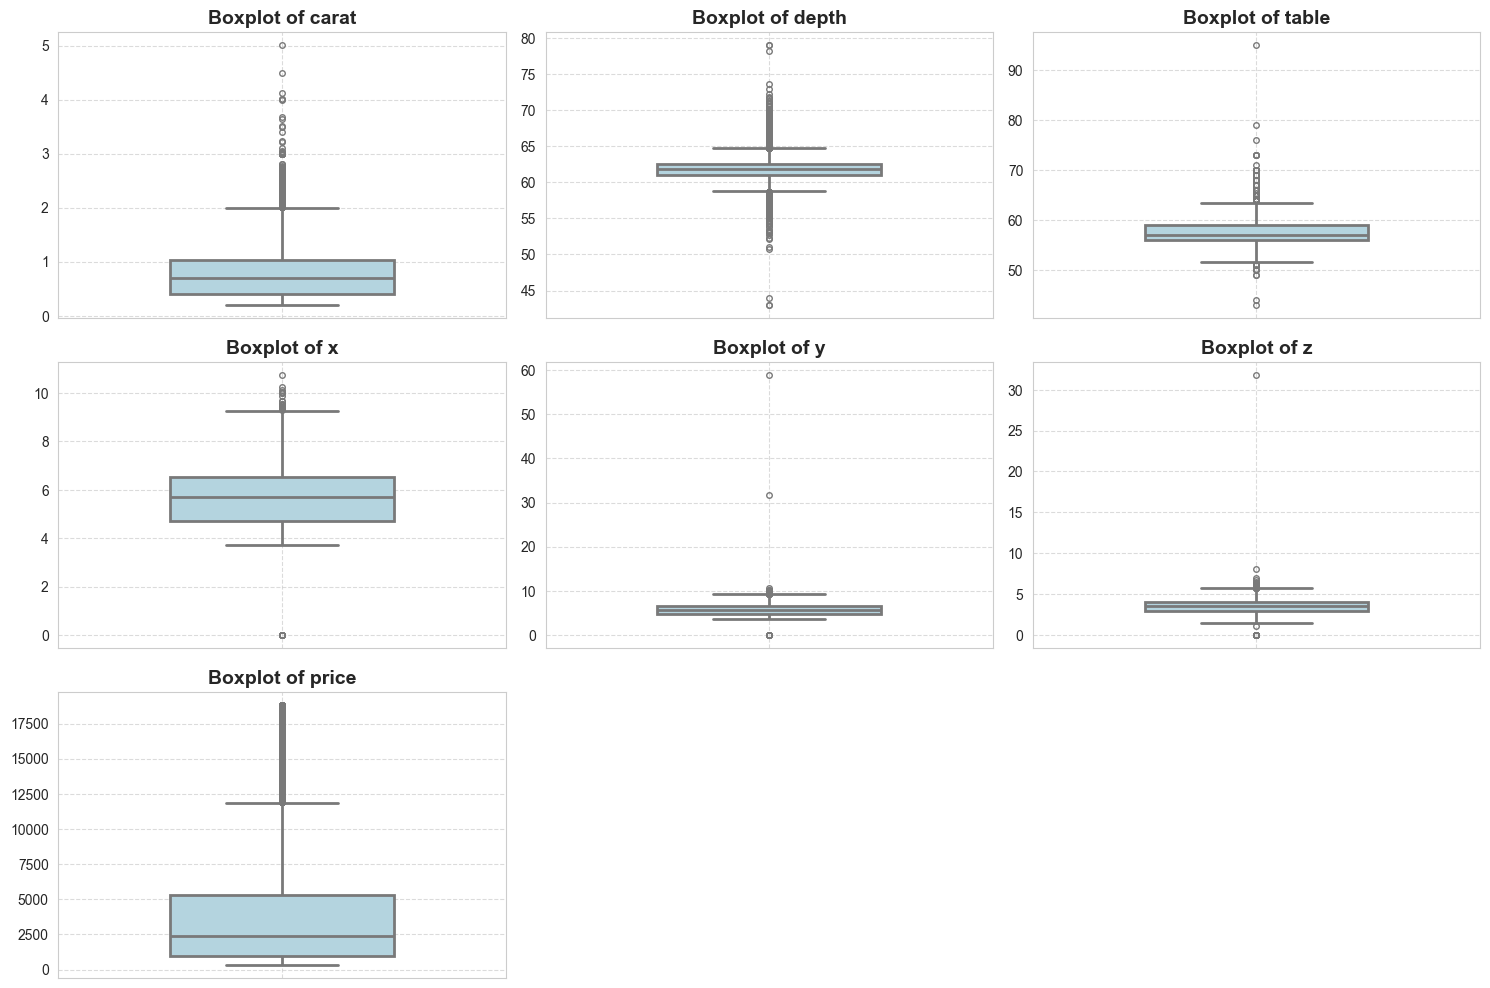

In [13]:
# Create boxplots for each numerical feature
sns.set_style("whitegrid")

# Define features to plot
features = ["carat", "depth", "table", "x", "y", "z", "price"]

# Set figure size

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # 3 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array for easier iteration

# Create boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i], color="lightblue", width=0.5, linewidth=2, fliersize=4)
    axes[i].set_title(f"Boxplot of {feature}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("")  # Remove y-axis labels for cleaner look
    axes[i].grid(True, linestyle="--", alpha=0.7)  # Light grid for readability

# Remove empty subplots
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Improve layout
plt.tight_layout()
plt.show()

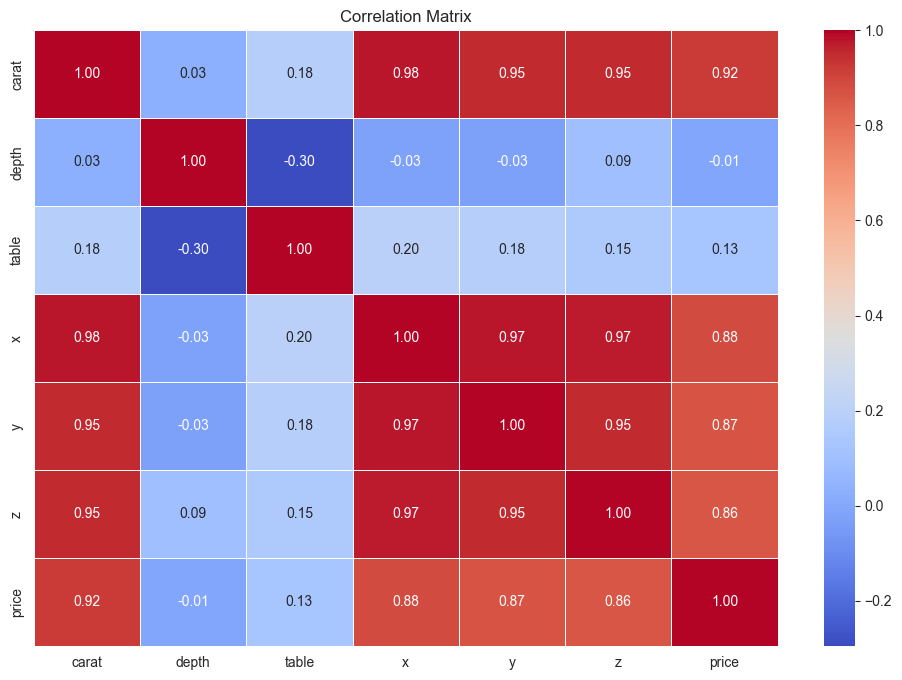

In [14]:
# Correlation matrix excluding categorical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Insights from Numerical Variables**

1. **Carat and Price Distributions**:  
   - Both **carat** and **price** are **right-skewed**, meaning most diamonds have low carat weight and price, while a few have extremely high values.  
   - **Action**: Apply **log transformation** to normalize price distribution and reduce skewness.  

2. **Presence of Data Errors**:  
   - Some diamonds have **x = 0, y = 0, or z = 0**, which are likely **incorrect entries**.  
   - **Action**: These records should be **removed** to prevent inaccuracies in the model.  

3. **Feature Engineering Opportunity**:  
   - Instead of using **x, y, and z** separately, computing **Volume = x × y × z** could provide a **better representation of size**.  
   - **Benefit**: Volume is a **single feature** that captures diamond dimensions more effectively than using x, y, and z independently.  

4. **Depth and Table Variability**:  
   - **Depth and Table** show a **wide range of values**, with some **extreme cases**.  
   - **Observation**: These may not be strong predictors of price but could impact diamond appearance.  
   - **Action**: Further investigation is needed to determine whether **filtering extreme values** improves model performance.  

**Pairwise Relationships**
1. **Carat vs. Price**:  
   - **Strong positive correlation**: As carat weight increases, price tends to rise significantly.  
   - **Outliers**: A few **high-carat diamonds** have exceptionally **high prices**, which skews the distribution.  

2. **Depth and Table vs. Price**:  
   - **Weak correlation**: Depth and table percentages **do not strongly impact price**.  
   - **Conclusion**: These features may influence **appearance** rather than **monetary value**.  

3. **x, y, z vs. Price**:  
   - **x, y, and z are highly correlated** with each other, as they all represent **diamond dimensions**.  
   - **They also strongly correlate with carat**, reinforcing the idea that **carat is the best size-related predictor of price**.  
   - **Outliers**: Some large x, y, z values deviate from the expected trend, requiring closer examination.  

**Boxplots & Outliers**
1. **Carat, x, y, z, depth, and table have extreme values**, indicating **potential outliers**.  
2. **Price has a large variance**, with **higher-end diamonds showing extreme prices**.  
3. **Zero values in x, y, and z** suggest **incorrect data entries**, which must be **removed**.  

**Insights from Correlation Matrix**
1. **Carat is the strongest predictor of price (`r = 0.92`)**, confirming that **larger diamonds are more expensive**.  
2. **x, y, and z are highly correlated (`r > 0.95`)**, meaning they provide redundant information.  
3. **Depth and Table have weak correlations with price (`r < 0.15`)**, suggesting they may not be useful for predictive modeling.  
4. **Potential Feature Engineering**:  
   - Since x, y, and z are redundant, a **volume feature (`x*y*z`)** could replace them.  
   - **Dropping depth and table** might simplify the model without losing predictive power.  
 


##### 1.3 EDA - Categorical variables

In [21]:
# Statistical summary of categorical features before Feature engineering
df.describe(include='category')

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

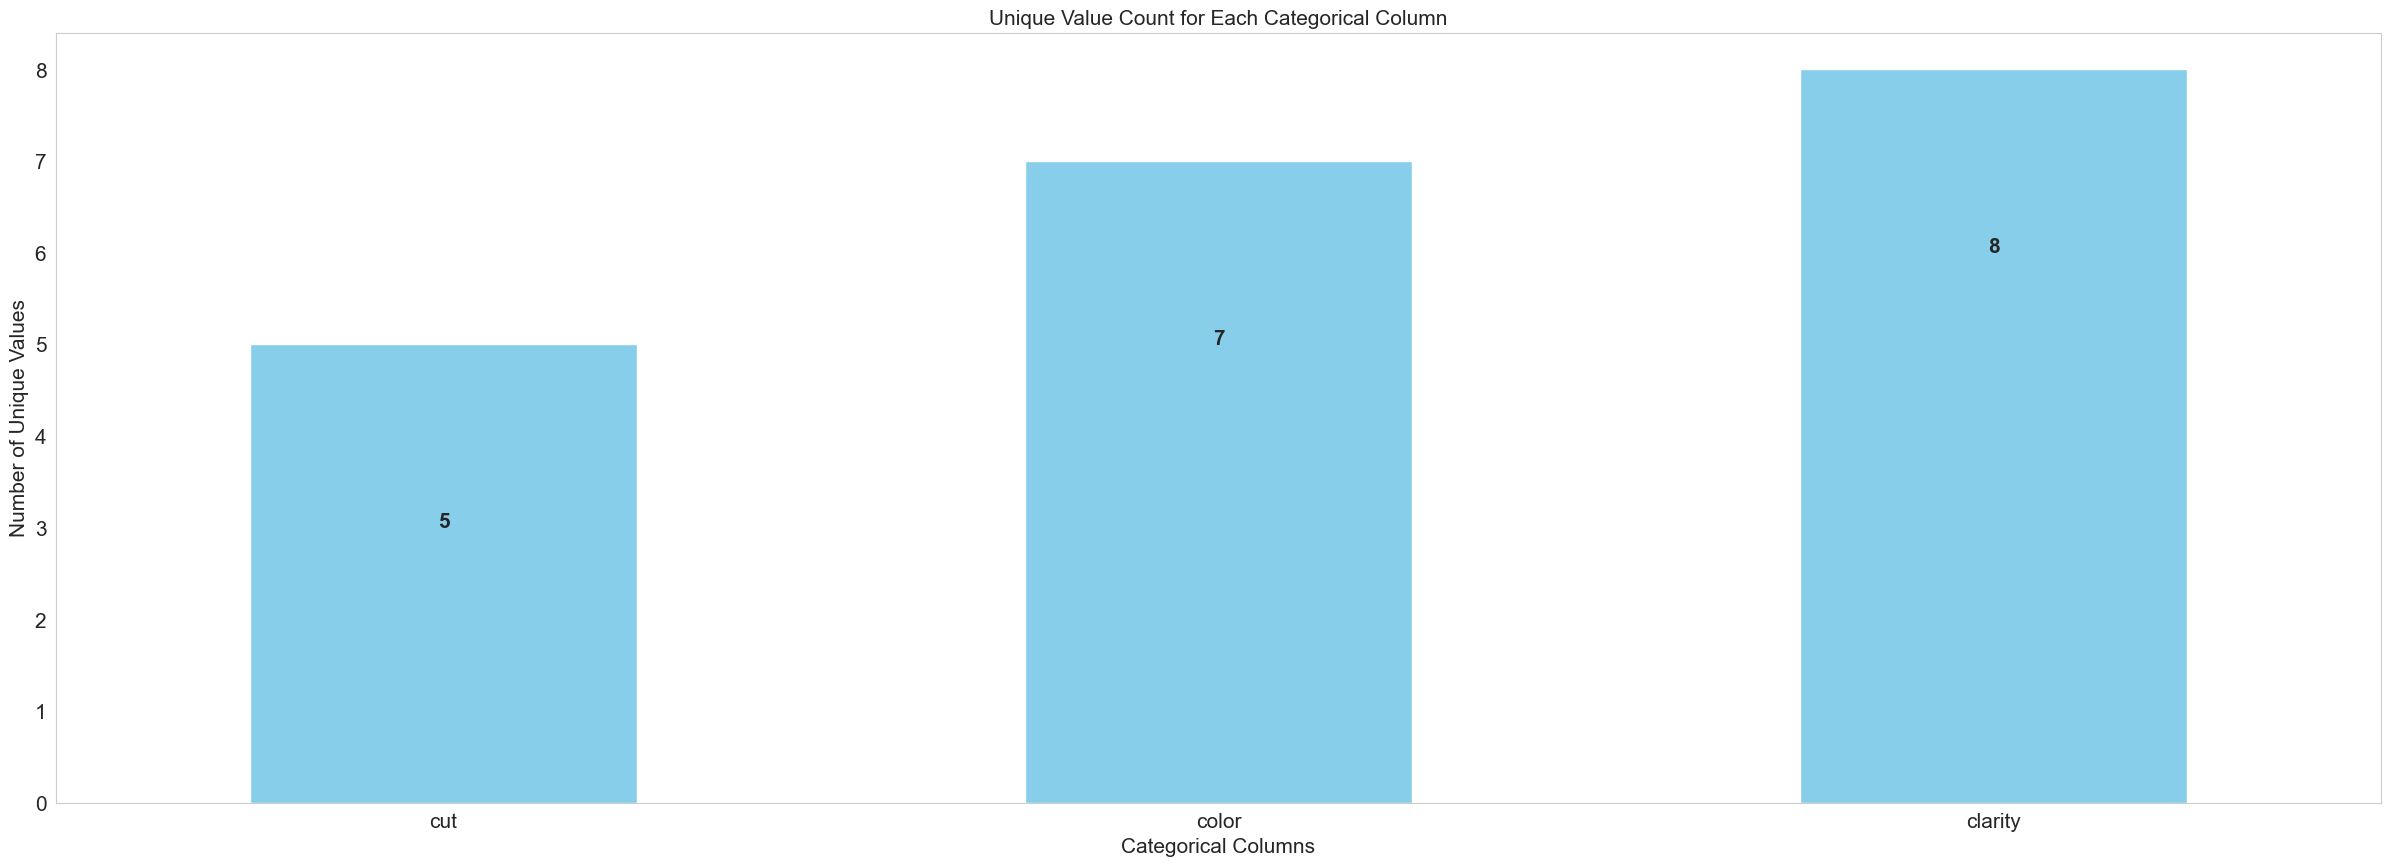

In [22]:
# Plot unique value count for each categorical column

# Select only categorical columns
categorical_cols = df.select_dtypes(include=['category'])

# Count unique values for each categorical column
unique_counts = categorical_cols.nunique()

# Plot
plt.figure(figsize=(30, 10))
ax = unique_counts.plot(kind='bar', color='skyblue')

# Add data labels on top of bars
for i, count in enumerate(unique_counts):
    ax.text(i, count  - 2 , str(count), ha='center', fontsize=15, fontweight='bold')

# Customize the plot
plt.xlabel("Categorical Columns", fontsize=15)
plt.ylabel("Number of Unique Values", fontsize=15)
plt.title("Unique Value Count for Each Categorical Column", fontsize=15)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.grid(False)  # Remove gridlines

# Show the plot
plt.show()

In [23]:
# Value counts for cut column (normalized to show percentages)
df['cut'].value_counts(normalize=True)*100

cut
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: proportion, dtype: float64

In [24]:
# Value counts for color column (normalized to show percentages)
df['color'].value_counts(normalize=True)*100

color
G    20.934372
E    18.162773
F    17.690026
H    15.394883
D    12.560252
I    10.051910
J     5.205784
Name: proportion, dtype: float64

In [25]:
# Value counts for clarity column (normalized to show percentages)
df['clarity'].value_counts(normalize=True)*100

clarity
SI1     24.221357
VS2     22.725250
SI2     17.044865
VS1     15.148313
VVS2     9.391917
VVS1     6.776047
IF       3.318502
I1       1.373749
Name: proportion, dtype: float64

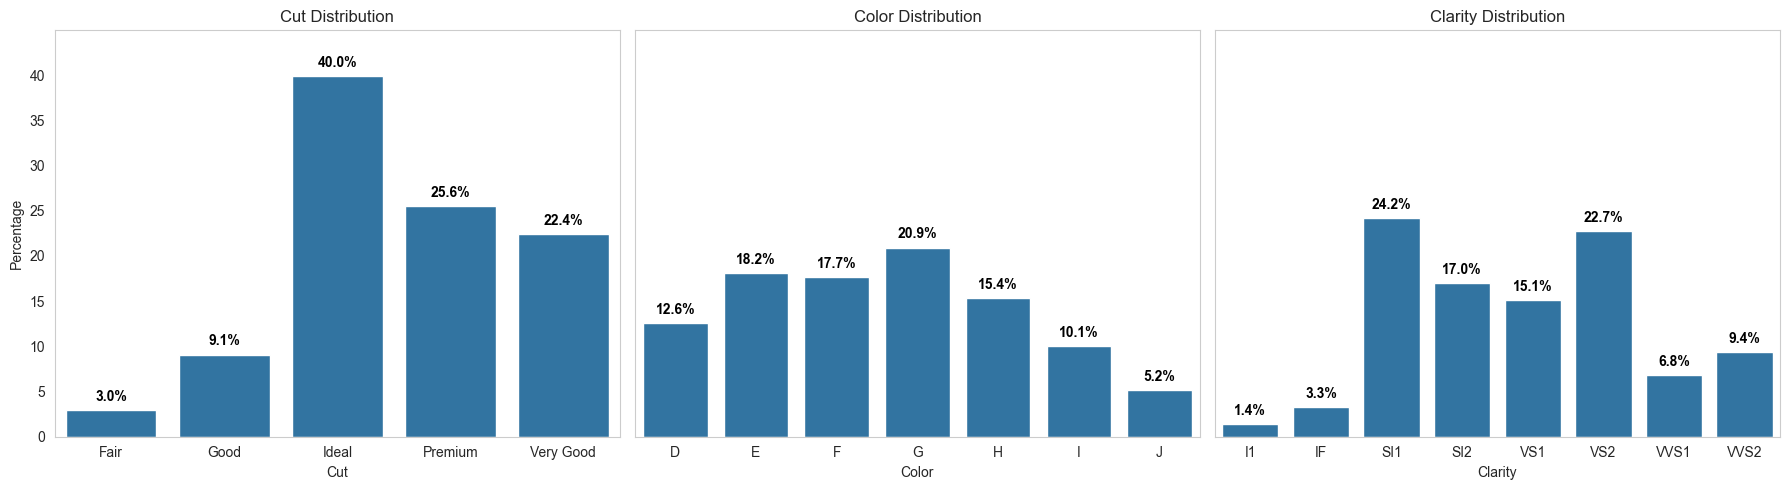

In [26]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey=True makes y-axis common

# List of categorical columns
categories = ['cut', 'color', 'clarity']
titles = ['Cut Distribution', 'Color Distribution', 'Clarity Distribution']

# Compute the global maximum percentage for y-axis scaling
max_y = max((df[col].value_counts(normalize=True) * 100).max() for col in categories)

# Loop through each category to generate bar charts
for i, col in enumerate(categories):
    counts = df[col].value_counts(normalize=True) * 100  # Compute percentages
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])

    # Add data labels on top of bars
    for p in axes[i].containers[0]:
        axes[i].text(p.get_x() + p.get_width() / 2, p.get_height() + 1, f'{p.get_height():.1f}%', 
                     ha='center', fontsize=10, fontweight='bold', color='black')

    # Set titles and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Percentage')
    axes[i].set_ylim(0, max_y + 5)  # Set a common y-axis with padding

    # Remove grid lines
    axes[i].grid(False)

plt.tight_layout()
plt.show()

**Insights from EDA - Categorical columns**

1. `Cut` has 5 unique categories, `color` has 7 categories, and `clarity` has 8 categories
2. Most common values:
- Cut: "Ideal" (39.95% of all diamonds)
- Color: "G" (20.93%)
- Clarity: "SI1" (24.22%)


#### 2. Pre-processing and Feature Engineering 

In [41]:
# Creat a copy of the original data
df_pre = df.copy()

# Step 1: Drop duplicate values 
df_pre.drop_duplicates(inplace=True)

# Step 2: Create the 'volume' feature
df_pre["volume"] = df_pre["x"] * df_pre["y"] * df_pre["z"]

# Step 3: Apply log transformation to 'price'
df_pre["log_price"] = np.log(df_pre["price"])

# Step 4: Keep only the required columns
df_pre = df_pre[["carat", "cut", "color", "clarity", "depth", "table", "volume", "log_price"]]

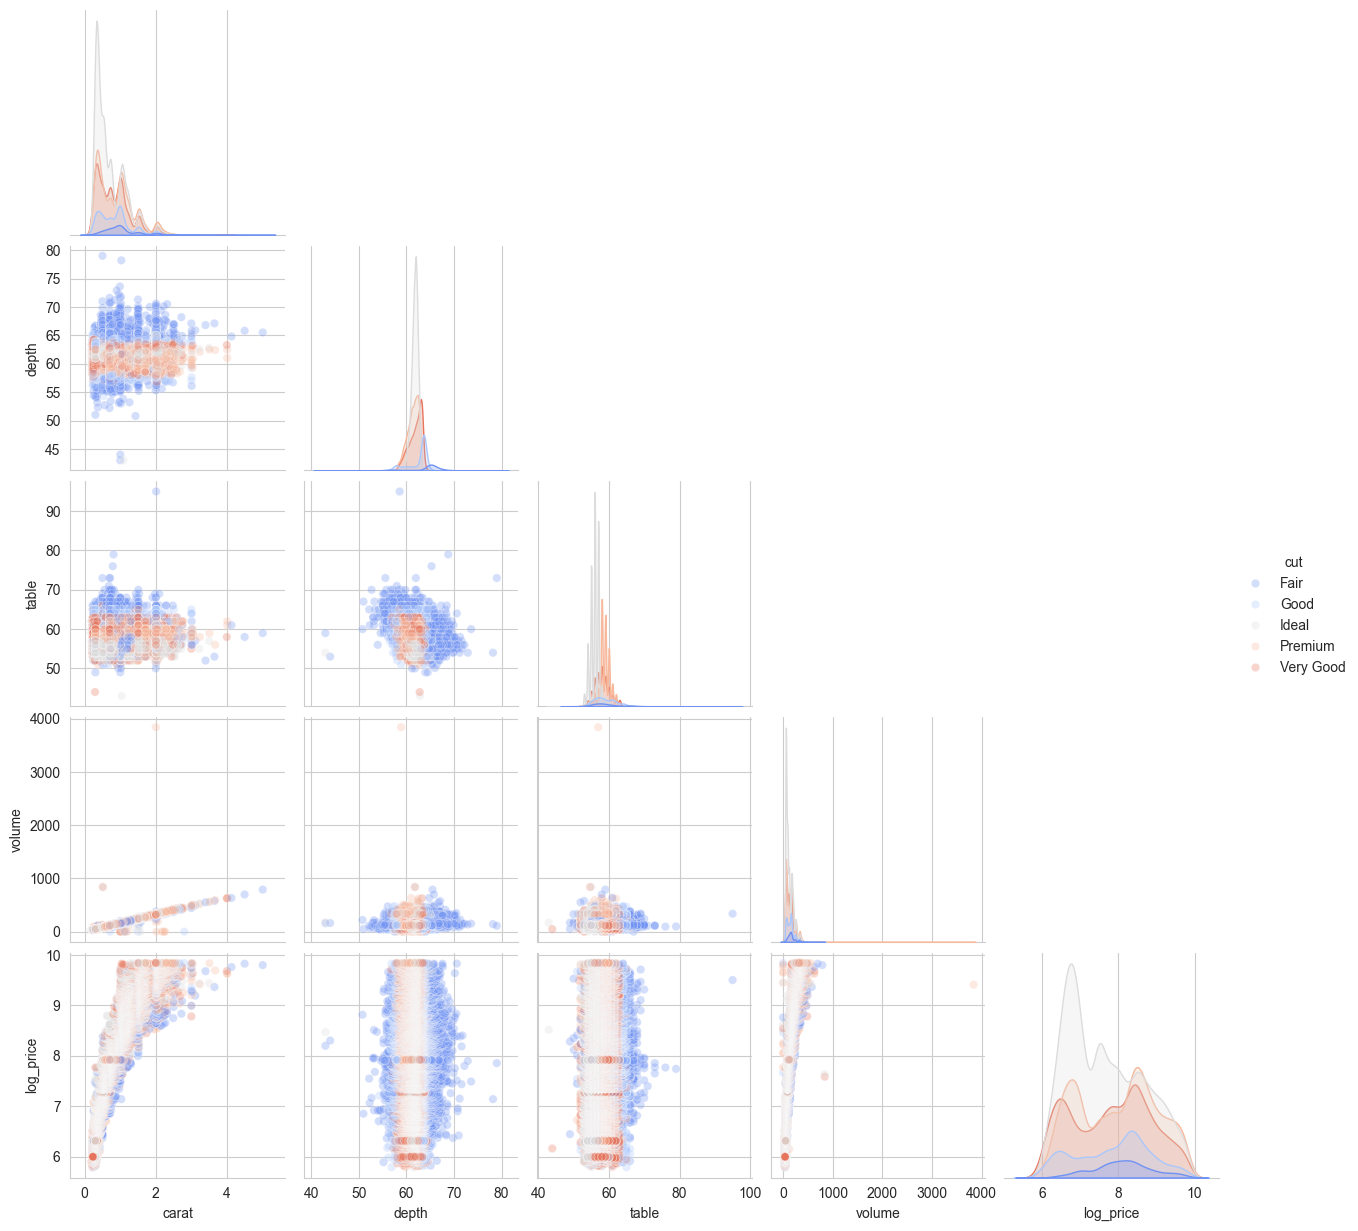

In [44]:
# Create pair plot after pre-processing and feature engineering
sns.pairplot(df_pre, 
             vars=["carat", "depth", "table", "volume", "log_price"], 
             hue="cut",  # Add categorical variable
             corner=True,
             palette="coolwarm", 
             plot_kws={'alpha': 0.3})

**Interpretation**

- This pair plot (scatterplot matrix) provides insights into the relationships between different diamond attributes, including carat, depth, table, volume, and log-transformed price (log_price). The colors represent different diamond cuts (Fair, Good, Ideal, Premium, Very Good).

**Insights**
- strong positive correlation between carat and price (log price)
- higher cara diamonds tend to have higher prices, but there are variations based on cut quality
- fair cut diamonds tend to be cheaper than premium and ideal cuts
- Volume shows a weak, non-linear correlation with price
- some diamonds have unexpectdly low prices for hight volumes-> these can be misclassified diamonds
- depth and table do not show strong correlations with price-> most values are concentrated around the standard diamond proportion
- distribution of depth is fairly normal, while table has some outliers
- depth and table alone are not strong predictors of the price, but they still might have a little influence
- the log prices shows better after then the raw price -> Ideal and Premium cuts have higher prices on avg, while fair and Godd cuts have wider price spread

**Data Issues**
- outliers in volume, depth and table can be due to data entry errors or unusual diamonds
- some high volume diamonds have unexpectedly low prices (-> we might handle this)

In [43]:
# Statistical summary of numerical features after Feature engineering
df_pre.describe()

carat         depth         table        volume     log_price
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000
mean       0.79778     61.748080     57.458109    129.826975      7.787138
std        0.47339      1.429909      2.233679     78.160819      1.014439
min        0.20000     43.000000     43.000000      0.000000      5.786897
25%        0.40000     61.000000     56.000000     65.190168      6.857514
50%        0.70000     61.800000     57.000000    114.840180      7.783641
75%        1.04000     62.500000     59.000000    170.823600      8.580497
max        5.01000     79.000000     95.000000   3840.598060      9.842835

**Insights from descriptive statistics after pre-processing and feature engineering:**

1. Carat (Diamond Weight)
- Mean: 0.798, Median: 0.7, Max: 5.01
- Most diamonds are less than 1 carat (as seen from the 25th percentile (0.4) and 75th percentile (1.04)).
- Right-skewed distribution → A few large diamonds pull the mean (0.798) above the median (0.7).
- Implication: Since carat strongly influences price, we expect larger carat values to correlate with higher prices.

2. Depth (%)
- Mean: 61.75%, Median: 61.8%, Range: 43% - 79%
- Most diamonds have a depth between 61.0% (Q1) and 62.5% (Q3), which is within the optimal range (57-63%) for well-cut diamonds.
- Min depth = 43% and max = 79% → Possible outliers (either poorly cut diamonds or data errors).
- Implication: Since depth has weak correlation with price, extreme depth values may indicate diamonds with poor light performance.

3. Table (%)
- Mean: 57.46%, Median: 57%, Range: 43% - 95%
- Most diamonds have a table between 56% (Q1) and 59% (Q3), which is close to the ideal range (53-60%).
- Table values above 65% or below 50% might be poorly cut diamonds.
- Implication: Since table has a weak correlation with price, extreme values could indicate unusual or less desirable diamonds.

4. Log_Price
- Mean: 7.79, Median: 7.78, Max: 9.84, Min: 5.79
- Why log transformation? The original price was right-skewed, so applying log(price) makes the distribution more normal.
- The log price range of 5.79 to 9.84 corresponds to a price range of $ 326 to $18,823 in the original data.
- Implication: A nearly normal log_price distribution makes linear regression models work better.

5. Volume
- Mean: 129.85, Median: 114.81, Max: 3,840.60, Min: 0.00
- Min volume = 0.00 → Possible data errors (some diamonds have zero dimensions).
- Right-skewed distribution → A few diamonds with extremely large volume.
- Implication: Since volume is highly correlated with carat, it is a good alternative feature to replace x, y, z.

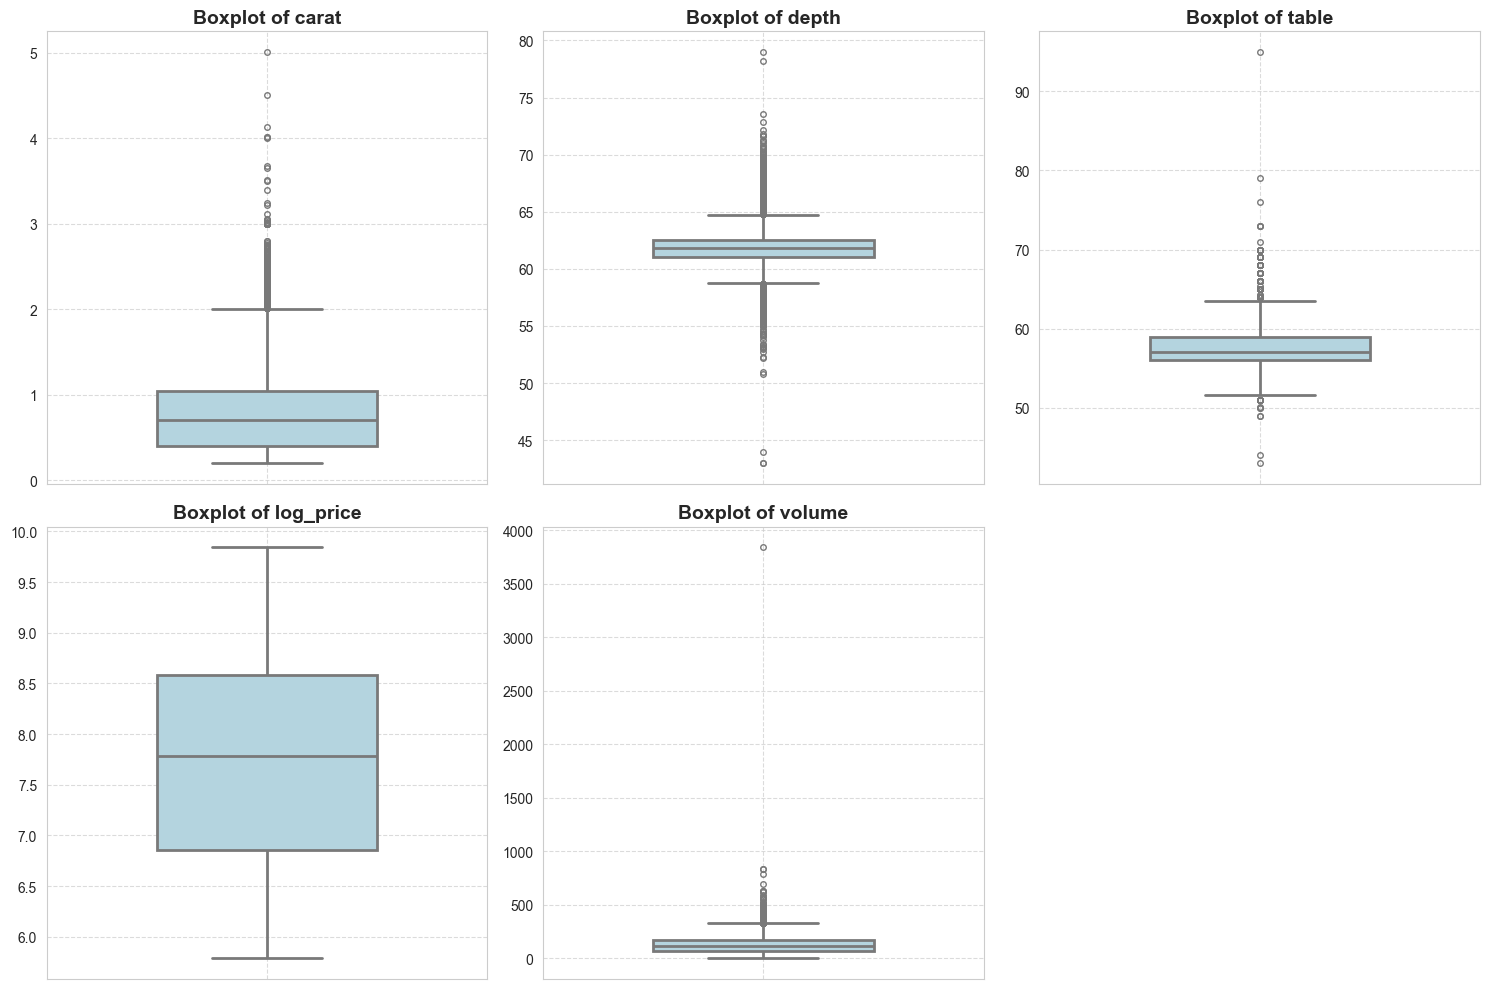

In [45]:
# Boxplot Visualization for Outliers Check after pre-processing and feature engineering
# Define features to plot
features = ["carat", "depth", "table", "log_price", "volume"]

# Set figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array for easier iteration

# Create boxplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(y=df_pre[feature], ax=axes[i], color="lightblue", width=0.5, linewidth=2, fliersize=4)
    axes[i].set_title(f"Boxplot of {feature}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("")  # Remove y-axis labels for cleaner look
    axes[i].grid(True, linestyle="--", alpha=0.7)  # Light grid for readability

# Remove empty subplot (since we have only 5 features)
fig.delaxes(axes[-1])

# Improve layout
plt.tight_layout()
plt.show()

**Insights from BoxPlots after pre-processing and feature engineering:**

1. Carat
- most diamonds are small, with the middle 50% (IQR) between ~0.4 and 1.04 carats.
- lots of outliers above 2 carats (luxury diamonds).
- Implication: The carat distribution is right-skewed, and we may need a log transformation to reduce the impact of extreme values.

2. Depth
- most diamonds have depth around 60-62% (the ideal range).
- Outliers exist below 50% and above 70% (potentially poorly cut diamonds).
- Implication: Depth has weak correlation with price, so we might not need it as a key predictor.

3. Table 
- most diamonds have a table between 56-60%, which is within the recommended range.
- outliers exist below 50% and above 70% (unusual proportions).
- Implication: If extreme table values correlate with poor diamond quality, we might want to remove them.

4. Log Price
- no extreme outliers—the log transformation helped normalize price distribution.
- Implication: The model will perform better with log_price instead of raw price.

5. Volume
- huge range of values with many extreme outliers.
- some diamonds have volume = 0, which is a clear data error
- Implication:Diamonds cannot have zero volume, so these should be removed and the right-skewed distribution suggests we might need a log transformation.

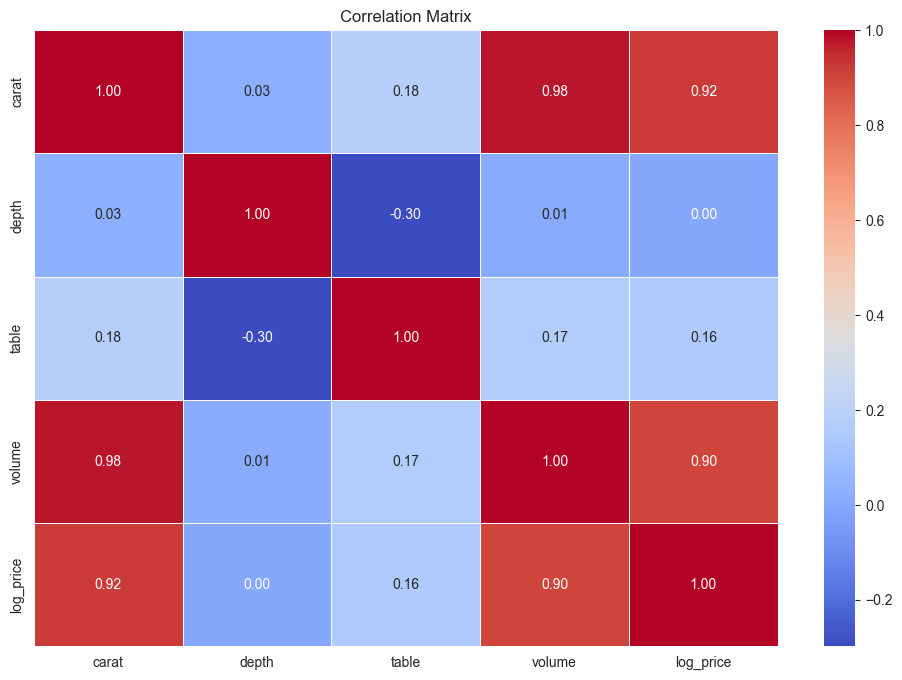

In [47]:
#Create Correlation HeatMap for the preprocessed data

numeric_df_pre = df_pre.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_pre.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Insights from Correlation Matrix after pre-processing and feature engineering:**
1. Carat and Volume
- Extremely high correlation, meaning they provide almost the same information.
- Drop one (probably volume) to reduce redundancy.

2. Carat and Log Price
- Strong positive correlation—Carat is a strong predictor of price.

3. Table and Log Price
- may have a minor impact on price
- Keep for now but monitor its importance.

4. Depth and Log Price
- depth may not be a useful feature for predicting price
- Consider dropping Depth if models improve without it.

In [48]:
### Drop the outliers
df_pre=df_pre[(df_pre["table"] > 50) & (df_pre["table"] < 70)]

df_pre = df_pre[(df_pre["depth"] > 50) & (df_pre["depth"] < 70)]

df_pre_v2=df_pre[["carat","cut",'color','clarity',"table","log_price"]]

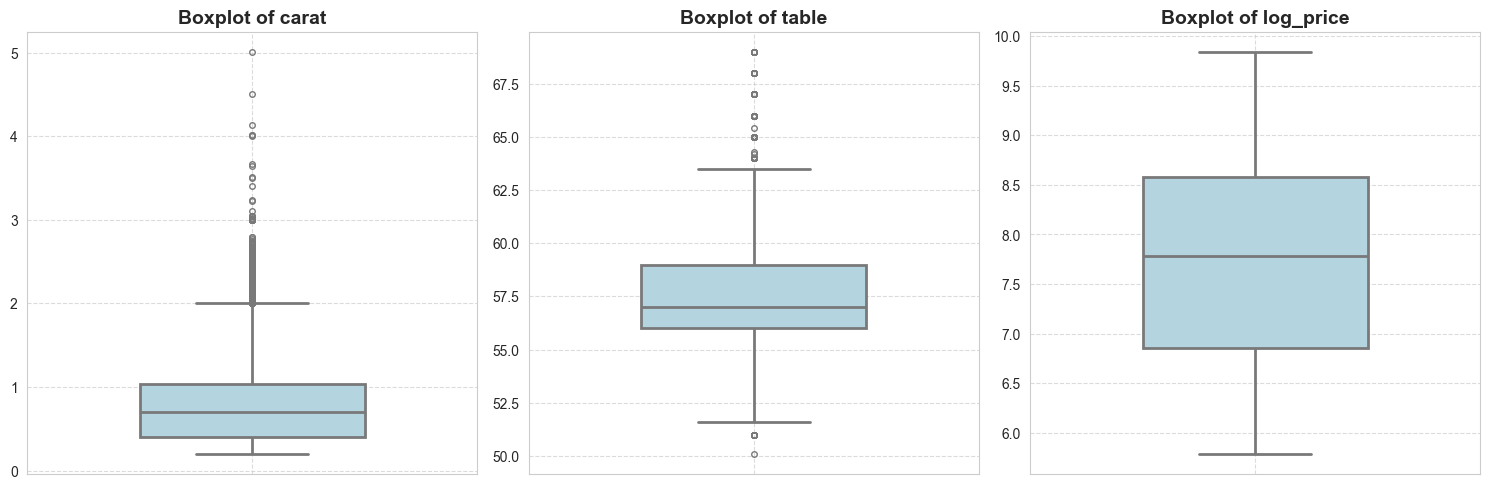

In [49]:
# Define features
features = ["carat", "table", "log_price"]

# Check if all features exist
missing_features = [f for f in features if f not in df_pre_v2.columns]
if missing_features:
    print(f"⚠️ Warning: The following features are missing from df_pre_v2: {missing_features}")

# Filter only existing features
features = [f for f in features if f in df_pre_v2.columns]

# Adjust grid size dynamically
num_features = len(features)
num_cols = min(3, num_features)
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = np.array(axes).flatten()  # Flatten for easier iteration

# Plot boxplots
for i, feature in enumerate(features):
    sns.boxplot(y=df_pre_v2[feature], ax=axes[i], color="lightblue", width=0.5, linewidth=2, fliersize=4)
    axes[i].set_title(f"Boxplot of {feature}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("")
    axes[i].grid(True, linestyle="--", alpha=0.7)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Improve layout
plt.tight_layout()
plt.show()


**Insights from BoxPlots after removing outliers**
1. Carat
- Median (middle line in the box) is around 0.75 to 1.0.
- Outliers (dots above the whiskers) → High-carat diamonds above ~2.5.
- Right-skewed distribution → More smaller diamonds, fewer larger ones.#### Table

2. Log Price
- The log transformation worked well.

3. Table
- Outliers above 65 → These may represent diamonds with unusually large table sizes.
- More spread-out distribution compared to carat
- Capping extreme values (e.g., removing values above 70) might improve model performance.

In [54]:
## Create a Data Preprocessing Function
# Data Preprocessing Function
def preprocess_data(df, use_polynomial=False):

    # Drop duplicate values
    df = df.drop_duplicates()
    
    # Define features and target variable
    X = df.drop(columns=["log_price"])  # Features
    y = df["log_price"]  # Target variable

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Identify categorical and numerical columns
    categorical_features = ["cut", "color", "clarity"]
    numerical_features = X.select_dtypes(include=["float64", "int64"]).columns.difference(categorical_features)

    ### Encode Categorical Variables ###
    encoder = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)

    # Fit encoder on training set
    X_train_encoded = encoder.fit_transform(X_train[categorical_features])
    X_test_encoded = encoder.transform(X_test[categorical_features])

    # Convert to DataFrame and retain column names
    train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
    test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

    # Drop original categorical features and concatenate encoded features
    X_train = X_train.drop(columns=categorical_features).reset_index(drop=True)
    X_test = X_test.drop(columns=categorical_features).reset_index(drop=True)

    X_train = pd.concat([X_train, train_encoded_df], axis=1)
    X_test = pd.concat([X_test, test_encoded_df], axis=1)

    # Scale Numerical Features
    scaler = StandardScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])

    if use_polynomial:
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train = poly.fit_transform(X_train)
        X_test = poly.transform(X_test)

    # Return fitted encoder, polynomial transformer (if used), and `use_polynomial` flag
    return X_train, X_test, y_train, y_test, encoder, poly if use_polynomial else None, use_polynomial


### 3. Modeling and Evaluation

1. Linear Regression (Baseline)
2. Linear Regression with Polynomial Features
3. XGBoost 

In [55]:
#Finalize the dataset and drop Volume and Depth
df_final=df_pre[["carat","cut",'color', 'clarity', "table", "log_price"]]

#### 3.1 Linear Regression (Baseline)

In [56]:
#Linear Regression as Baseline Model
X_train, X_test, y_train, y_test, fitted_encoder,poly, use_polynomial = preprocess_data(df_final, use_polynomial=False)

param_grid = {}

grid_lr=GridSearchCV(LinearRegression(), param_grid,cv=10)
grid_lr.fit(X_train,y_train)

best_lr = grid_lr.best_estimator_
y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

metrics = {
        "Model": 'LinearRegression',
        "Best Params": grid_lr.best_params_,
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train R2 Score": r2_score(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test R2 Score": r2_score(y_test, y_test_pred),
    }

print("Metrics from Linear Regression (baseline model):")
metrics


Metrics from Linear Regression (baseline model):


{'Model': 'LinearRegression',
 'Best Params': {},
 'Train MAE': 0.2687438756885214,
 'Train RMSE': 0.340593059075441,
 'Train R2 Score': 0.883844906360903,
 'Test MAE': 0.27097249744982815,
 'Test RMSE': 0.3470273624126645,
 'Test R2 Score': 0.8796683948848301}

#### 3.2 Linear Regression with Polynomial Features

In [57]:
#Linear Regression with Polynomial Features
X_train, X_test, y_train, y_test, fitted_encoder,poly, use_polynomial = preprocess_data(df_final, use_polynomial=True)

param_grid = {}

grid_lr=GridSearchCV(LinearRegression(), param_grid,cv=10)
grid_lr.fit(X_train,y_train)

best_lr = grid_lr.best_estimator_
y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

metrics = {
        "Model": 'LinearRegression',
        "Best Params": grid_lr.best_params_,
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train R2 Score": r2_score(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test R2 Score": r2_score(y_test, y_test_pred),
    }

print("Metrics from Linear Regression with Polynomial Features:")
metrics

Metrics from Linear Regression with Polynomial Features:


{'Model': 'LinearRegression',
 'Best Params': {},
 'Train MAE': 0.11434759018302393,
 'Train RMSE': 0.1501649650367074,
 'Train R2 Score': 0.9774210411866825,
 'Test MAE': 0.11629130293619871,
 'Test RMSE': 0.16734583622364024,
 'Test R2 Score': 0.9720177847442525}

**Interpretation**
- Linear Regression model has been trained and evaluated. The results indicate excellent predictive performance with minimal overfitting. Let's analyze the key metrics:
- MAE: Low error, good prediction accuracy
- RMSE: Small deviation, robust model
- R² Score: Very high, excellent fit

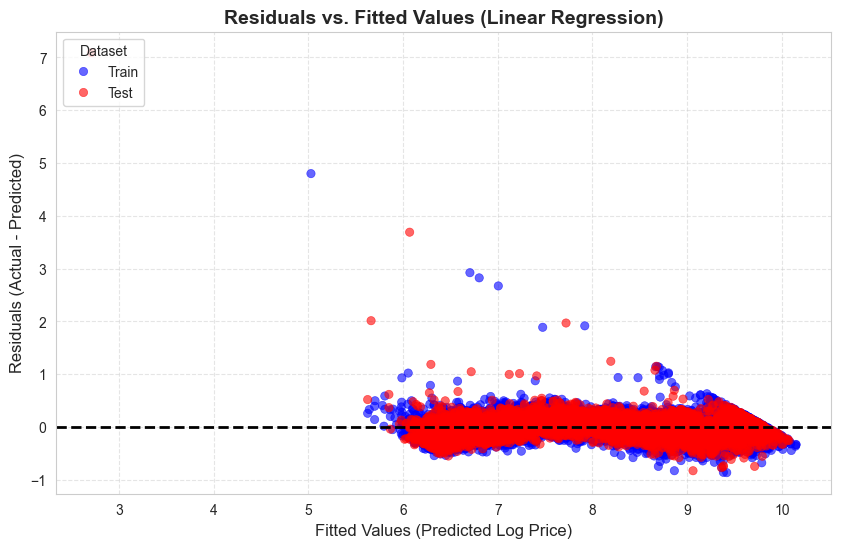

In [59]:
## Create Residual Plot

# Compute Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Create DataFrame for easy plotting
residuals_df = pd.DataFrame({
    "Fitted Values": np.concatenate([y_train_pred, y_test_pred]),
    "Residuals": np.concatenate([train_residuals, test_residuals]),
    "Dataset": ["Train"] * len(y_train_pred) + ["Test"] * len(y_test_pred)
})


plt.figure(figsize=(10, 6))
sns.scatterplot(data=residuals_df, x="Fitted Values", y="Residuals", hue="Dataset", alpha=0.6, edgecolor=None, palette={"Train": "blue", "Test": "red"})
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)  # Reference line at 0
plt.title("Residuals vs. Fitted Values (Linear Regression)", fontsize=14, fontweight="bold")
plt.xlabel("Fitted Values (Predicted Log Price)", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.legend(title="Dataset", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

**Insights from the Residuals plot**

1. Residuals are mostly centered around 0
 - The horizontal dashed black line at 0 represents an ideal model with no systematic bias.
2. Rightward funnel shape -> potential heteroscedasticity
3. A few large residuals -> blue points above 3

This plot does suggest mild heteroskedasticity, as residual variance seems to change across different fitted values.

Feature Names Length: 209
Coefficients Length: 209


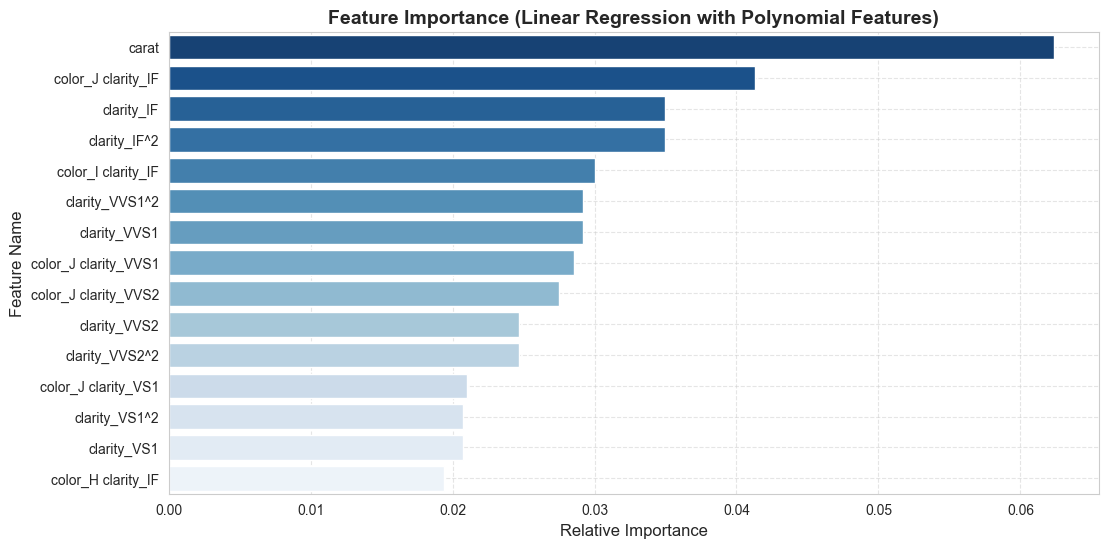

In [ ]:
## Check Feature Importance

# Run preprocessing & get encoder and polynomial transformer
X_train, X_test, y_train, y_test, fitted_encoder, poly_transformer, use_polynomial = preprocess_data(df_final, use_polynomial=True)

# Extract categorical feature names from fitted OneHotEncoder
categorical_feature_names = fitted_encoder.get_feature_names_out(["cut", "color", "clarity"]).tolist()

# Extract numerical feature names (before encoding)
numerical_feature_names = df_final.select_dtypes(include=["float64", "int64"]).columns.difference(["cut", "color", "clarity", "log_price"]).tolist()

# Combine numerical + categorical feature names
base_feature_names = numerical_feature_names + categorical_feature_names

# If polynomial features were generated, extract the correct feature names
if use_polynomial and poly_transformer:
    poly_feature_names = poly_transformer.get_feature_names_out(base_feature_names)
    feature_names = poly_feature_names.tolist()  # Use polynomial feature names
else:
    feature_names = base_feature_names  # Use normal feature names if no polynomial features

# Extract coefficients from the best Linear Regression model
coefficients = grid_lr.best_estimator_.coef_

# Check Lengths Before Creating DataFrame
print(f"Feature Names Length: {len(feature_names)}")
print(f"Coefficients Length: {len(coefficients)}")

if len(feature_names) == len(coefficients):
    # Create DataFrame for feature importance
    feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": np.abs(coefficients)})

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

    # Normalize for better visualization
    feature_importance_df["Importance"] /= feature_importance_df["Importance"].sum()

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance_df[:15], x="Importance", y="Feature", hue="Feature", legend=False, palette="Blues_r")
    plt.title("Feature Importance (Linear Regression with Polynomial Features)", fontsize=14, fontweight="bold")
    plt.xlabel("Relative Importance", fontsize=12)
    plt.ylabel("Feature Name", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
else:
    print("Error: Feature names and coefficients have different lengths. Check encoding process.")

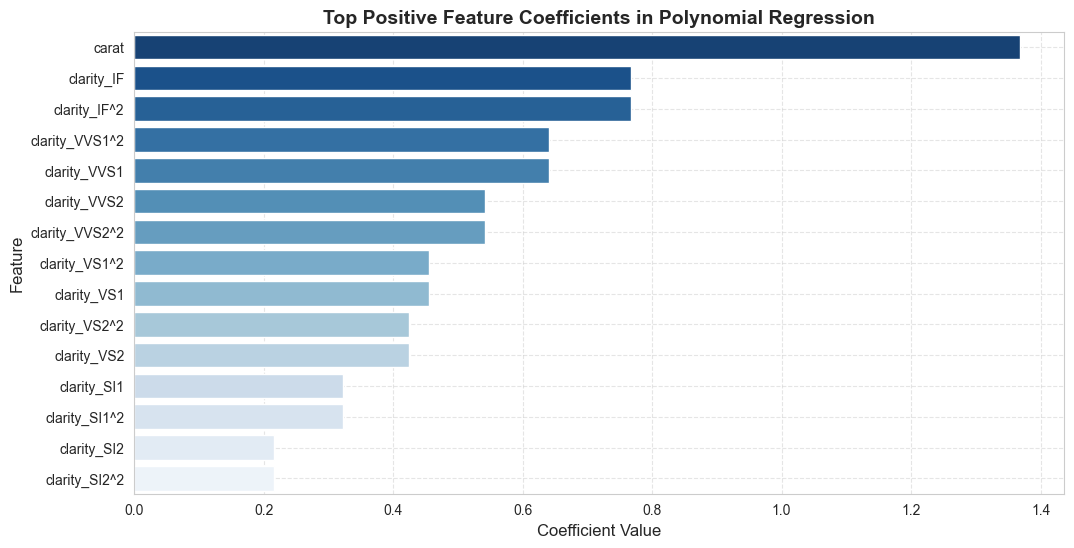

In [64]:
feature_names = poly.get_feature_names_out()

# Extract model coefficients
coefficients = best_lr.coef_

# Combine into a DataFrame for better readability
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort by absolute coefficient values (most important features first)
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)
coef_df = coef_df[coef_df["Coefficient"] > 0]

coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Step 7: Plot the Top 15 Positive Coefficients
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df[:15], x="Coefficient", y="Feature", hue="Feature", legend=False, palette="Blues_r")
plt.title("Top Positive Feature Coefficients in Polynomial Regression", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

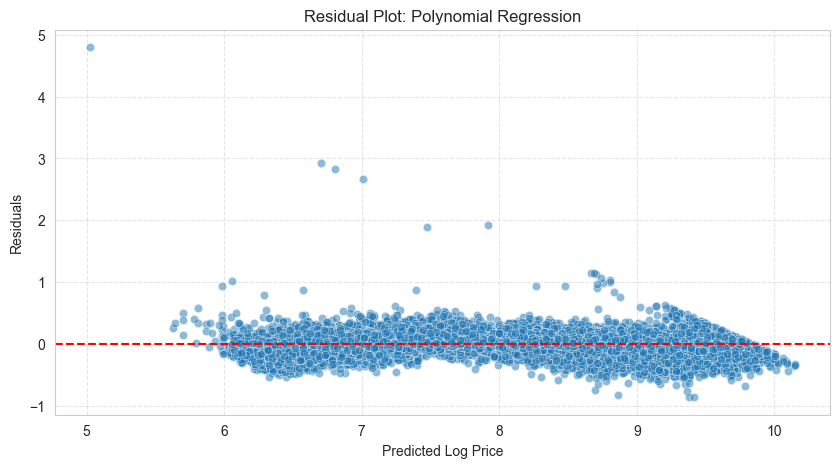

In [65]:
y_train_pred = best_lr.predict(X_train)

# Residuals
residuals = y_train - y_train_pred

# Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Log Price")
plt.ylabel("Residuals")
plt.title("Residual Plot: Polynomial Regression")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insights**
1. The weight of the diamond (carat) dominates the prediction, confirming that diamond size is the strongest determinant of price.
2. Features like clarity_IF^2 and clarity_VVS1^2 appear in the top 15, indicating that clarity has a nonlinear impact on price.-> Polynomial Features Matter
3. The interaction terms are created by the polynomial feature transformation and these interaction terms are significant. The presence of interaction terms (color_J * clarity_IF, color_H * clarity_IF) indicates that the combination of color and clarity plays a role in determining price. 

**NEXT STEPS**
- Our Linear Regression model is already excellent, with a Test R² of `0.975`. This means 97.5% of the variance in price is explained by the model—a near-perfect fit. In this case, a tree-based model (like Random Forest or XGBoost) may not be necessary unless you have specific reasons to test it.
- Also we have a mild heteroskedasticity which suggests that we do not have constant variance, violating the assumption of linear regression.Therefore we try to train a small XGBoost model with fewer trees and lower complexity checking if it improves Test R².

#### 3.3 XGBoost 

In [68]:
#XGBoost
X_train, X_test, y_train, y_test, fitted_encoder,poly,use_polynomial = preprocess_data(df_final, use_polynomial=False)

param_grid = {
    "n_estimators": [300, 500],
    "learning_rate": [0.01, 0.05],
    "max_depth": [3, 6],
    "min_child_weight": [1, 5],
    "colsample_bytree": [0.5, 0.7],
    "subsample": [0.5, 0.7],
    "gamma": [0.1, 0.3]
}

grid_xgb=GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid,cv=10)
grid_xgb.fit(X_train,y_train)

best_model = grid_xgb.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

metrics = {
        "Model": 'XGBoost',
        "Best Params": grid_xgb.best_params_,
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Train R2 Score": r2_score(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test R2 Score": r2_score(y_test, y_test_pred),
    }

print("Metrics from XGBoost:")
metrics

Metrics from XGBoost:


{'Model': 'XGBoost',
 'Best Params': {'colsample_bytree': 0.7,
  'gamma': 0.1,
  'learning_rate': 0.05,
  'max_depth': 6,
  'min_child_weight': 5,
  'n_estimators': 500,
  'subsample': 0.7},
 'Train MAE': 0.0778200211758018,
 'Train RMSE': 0.10443486131412151,
 'Train R2 Score': 0.9890791193363812,
 'Test MAE': 0.08183945178228828,
 'Test RMSE': 0.11133675187781936,
 'Test R2 Score': 0.987614048780075}

**Insights**

- Train R²: 0.8918 → Test R²: 0.8913 → XGBoost generalizes well (no overfitting), but it still lags behind Polynomial Regression (0.9752 Test R²).
- MAE and RMSE are higher in XGBoost, meaning larger prediction errors.
-Polynomial Regression still outperforms XGBoost in all metrics.--> The relationship between diamond features and price is mostly smooth, making polynomial regression a natural fit.

Tree-based models like XGBoost usually excel when the data has complex, irregular patterns, but this dataset has mostly smooth nonlinear trends, which polynomial regression captures efficiently.

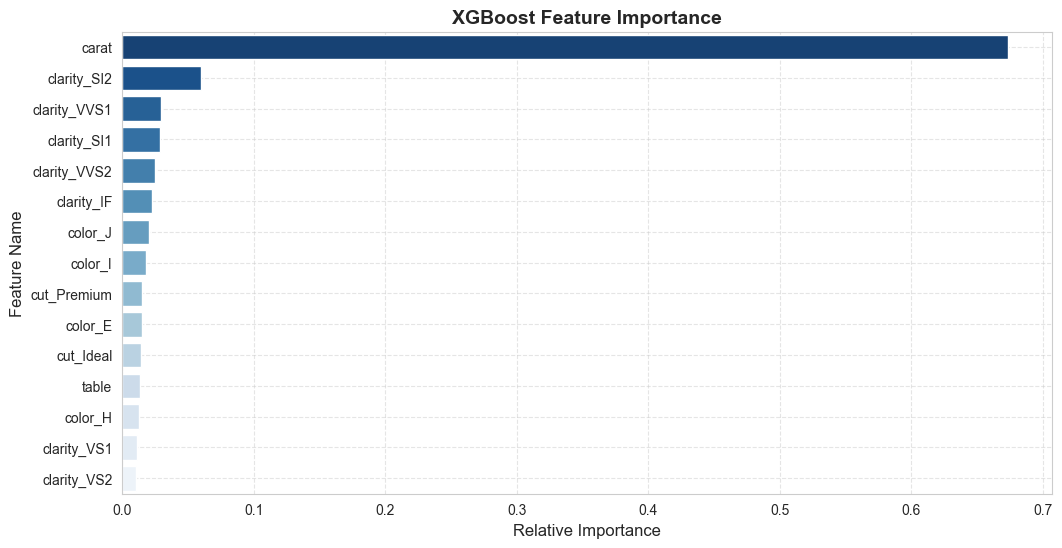

In [71]:
## Feature Importance XGBoost

# Extract feature importance from XGBoost
importances = best_model.feature_importances_

# Get feature names from training data
feature_names = X_train.columns.tolist()  # Ensure this matches XGBoost input features

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df[:15], x="Importance", y="Feature", hue="Feature", legend=False, palette="Blues_r")
plt.title("XGBoost Feature Importance", fontsize=14, fontweight="bold")
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


**Insights:**
1. Carat Dominates Predictions
- carat is by far the most important feature in the XGBoost model, accounting for the vast majority of the model’s predictive power.
- This aligns with Polynomial Regression, where carat was also the most significant feature.
- This suggests that diamond price is heavily dependent on carat weight, with other factors playing a much smaller role.
2. Clarity Features Are the Next Most Important
- clarity_SI2, clarity_VVS1, clarity_VVS2, clarity_SI1, and clarity_IF are the next most influential factors.
- This makes sense, as clarity impacts diamond pricing, but not as much as carat.
3. Color and Cut Have Less Influence
- cut_Premium, cut_Ideal, and various color categories appear lower in importance.
- This suggests that color and cut do influence price but are secondary factors compared to carat and clarity.
- This is consistent with real-world diamond pricing, where carat weight is the primary driver.

### 4. Conclusion

**XGBoost vs. Polynomial Regression: Feature Importance Comparison**

**Key Observations:**
1. Both Models Agree That Carat Is the Most Important Feature
- In both XGBoost and Polynomial Regression, carat is by far the most dominant factor in predicting diamond prices.
- This confirms that carat weight is the primary driver of diamond prices, as expected.
️2. Polynomial Regression Captures More Interactions
- Polynomial regression highlights interaction terms, such as:
- color_J * clarity_IF
- clarity_IF²
- clarity_VVS1²
- These interaction effects are not explicitly captured by XGBoost, which automatically models nonlinearities without creating explicit polynomial terms.
3. XGBoost Emphasizes Individual Features More
- In XGBoost, clarity_SI2, clarity_VVS1, and clarity_IF are among the next most important features after carat.
- This suggests that XGBoost is treating clarity as a key factor but isn’t explicitly modeling interactions like polynomial regression does.
4. Cut and Color Have Low Influence in Both Models
- Neither model assigns high importance to cut or color.
- This means diamond pricing is more dependent on carat and clarity than on color and cut quality.

**Which Model Is Better?**
- Polynomial Regression has a higher Test R² (0.975 vs. 0.891 for XGBoost), meaning it explains more variance in diamond prices.
- Polynomial Regression explicitly models interactions, which seem to be important in this dataset.
- XGBoost is still a strong model, but it does not fully capture the same interaction effects as Polynomial Regression.